# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares.
       If it falls further, buy some more, etc...
    3. If the SPY closes at a X-day high, sell your entire long position.
    
    (Scaling in)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 2

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions)
s.run()

Retrieve log DataFrames

In [7]:
s.tlog, s.dbal = s.get_logs()
s.stats = s.stats()

In [8]:
s.tlog.tail(100)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total
18,2009-07-06,36.94,2009-07-15,38.29,1.35,195.75,145,926.04
19,2009-07-06,36.94,2009-07-16,38.33,1.39,201.55,145,1127.59
20,2009-07-28,38.35,2009-08-03,40.77,2.42,350.90,145,1478.49
21,2009-07-28,38.35,2009-08-04,41.08,2.73,395.85,145,1874.34
22,2009-08-10,39.10,2009-08-27,39.57,0.47,70.97,151,1945.31
23,2009-08-10,39.10,2009-08-28,40.18,1.08,164.16,152,2109.47
24,2009-09-01,38.79,2009-09-02,42.48,3.69,575.64,156,2685.11
25,2009-09-01,38.79,2009-09-03,44.65,5.86,914.16,156,3599.27
26,2009-09-21,45.15,2009-10-06,47.60,2.45,367.50,150,3966.77
27,2009-09-21,45.15,2009-10-07,47.90,2.75,415.25,151,4382.02


In [9]:
s.dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2019-06-27,14799.60,14799.60,14799.60,0,14799.60,1
2019-06-28,14799.60,14799.60,14799.60,0,14799.60,1
2019-07-01,14799.60,14799.60,14799.60,602,2.44,0
2019-07-02,15443.74,14938.06,15383.53,602,2.44,1
2019-07-03,15443.74,15443.74,15443.74,0,15443.74,2


Generate strategy stats - display all available stats

In [10]:
pf.print_full(s.stats)

start                                                   2007-03-08
end                                                     2019-07-03
beginning_balance                                            10000
ending_balance                                            15443.74
total_net_profit                                           5443.74
gross_profit                                              19643.07
gross_loss                                               -14199.34
profit_factor                                                 1.38
return_on_initial_capital                                    54.44
annual_return_rate                                            3.59
trading_period                           12 years 3 months 25 days
pct_time_in_market                                           22.14
total_num_trades                                               118
num_winning_trades                                              75
num_losing_trades                                             

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

2007-03-08 00:00:00 BUY  260 GDX @ 38.35
2019-07-03 00:00:00 SELL 260 GDX @ 25.65


Plot Equity Curves: Strategy vs Benchmark

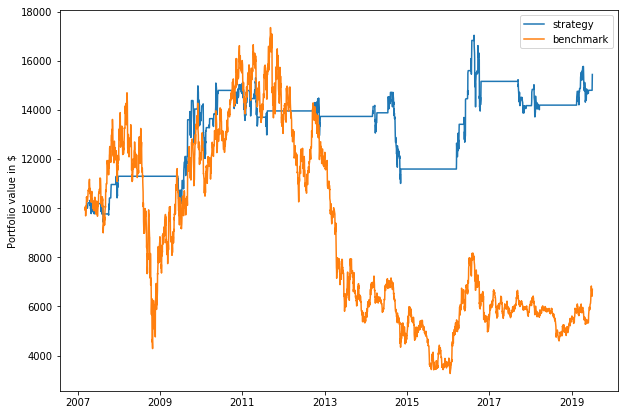

In [12]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

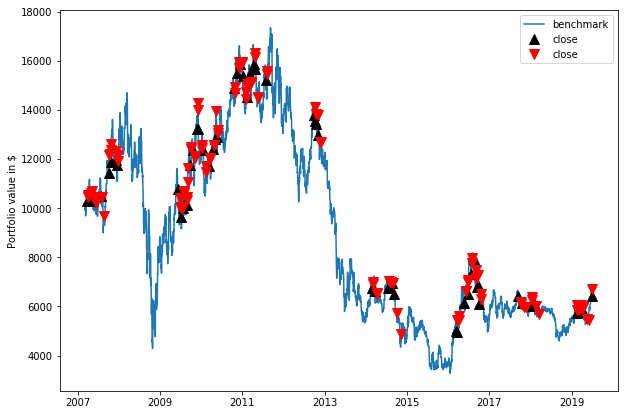

In [13]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,3.59,-3.20
max_closed_out_drawdown,-28.09,-81.15
drawdown_annualized_return,-7.82,25.35
drawdown_recovery,-3.52,-4.36
best_month,22.96,67.61
worst_month,-17.70,-52.01
sharpe_ratio,0.30,0.13
sortino_ratio,0.21,0.20
monthly_std,3.62,10.77


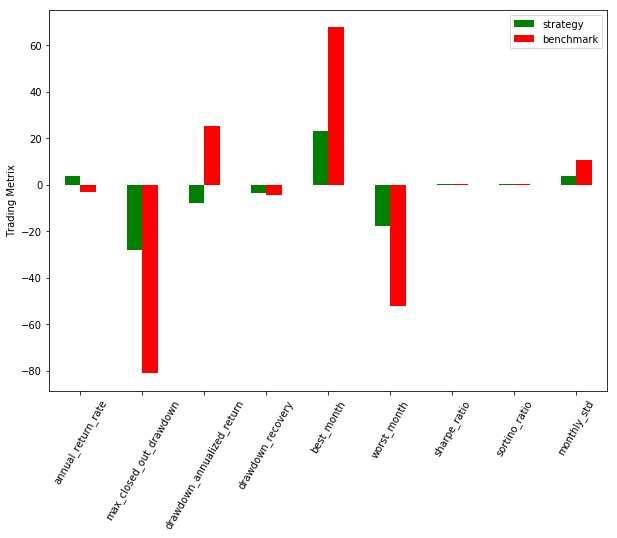

In [14]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(s.stats, benchmark.stats, *metrics)
df